<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
        
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Gustavo Adrián Herrera Barragán, Luis Jorge Ahumada Cerda & Santiago Cataño Besson

**Fecha:** 30 de marzo del 2023.

**Expedientes** : 734546, XXXXXX & XXXXXX
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/adrianhb01/Proyecto_Tema_2_Equipo_8.git

# Proyecto TEMA-2

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/b/b6/Proyecto_en_construccion.jpg" width="300px" height="100px" />


# Proyecto Módulo 2- Guía.
> Se especifican los componentes básicos que deberá tener cada proyecto. El proyecto debe ser un problema que utilice datos reales, ya sea de una empresa física real o de alguna página de internet que proporcione bases de datos confiables. Con la información obtenida, se pretende utilizar todas las herramientas vistas durante el curso para la correcta modelación y simulación del cierto problema con ciertas variables de interés.

### Diagrama:

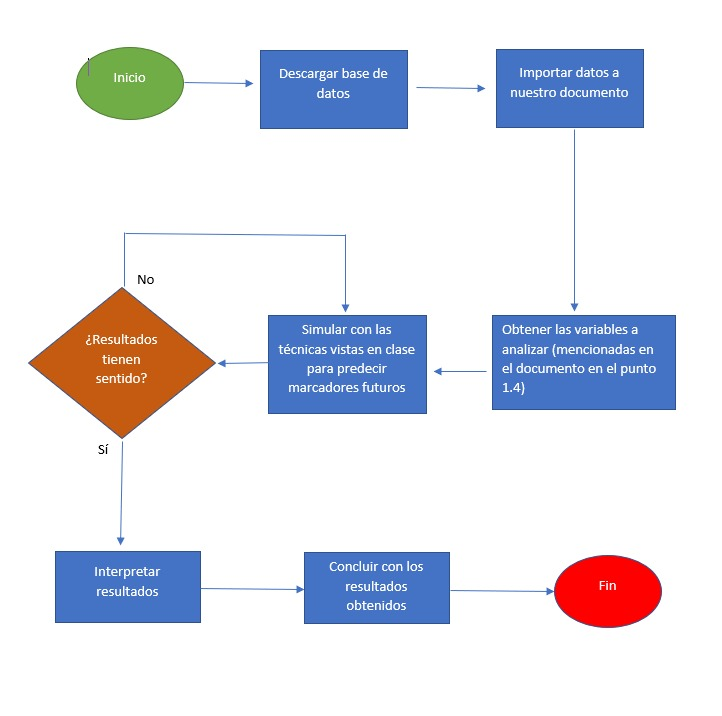

In [4]:
Image(filename = "Diagrama .jpeg")

___
## 1. Entregable.
Los trabajos deben tener los siguientes componentes básicos.


### 1.1 "Predicción de marcadores en partidos de fútbol".


### 1.2 Objetivos.
> #### 1.1 Objetivo general.
>  - El objetivo general de este proyecto es desarrollar un modelo capaz de predecir el resultado de un partido de fútbol, basado en datos históricos y actuales del equipo.
> #### 1.2 Objetivos específicos
>  - Recopilar y limpiar los datos necesarios para el modelo.
>  - Realizar un análisis exploratorio de los datos para identificar patrones y tendencias.
>  - Identificar las variables más importantes para predecir el resultado de un partido.
>  - Evaluar el rendimiento del modelo utilizando diferentes métricas de evaluación.
>  - Implementar el modelo en una aplicación web para permitir a los usuarios predecir el resultado de los partidos.

### 1.3 Definición del problema.
> 
El escenario de negocio que se va a modelar es el de un sitio web de apuestas deportivas en línea, el cual ofrece a los usuarios la posibilidad de realizar apuestas en partidos de fútbol. El objetivo de este proyecto es desarrollar un modelo de aprendizaje automático que permita predecir el resultado de los partidos y, de esta manera, mejorar la precisión de las apuestas.



### 1.4 Nodos y variables que se decidieron simular y porqué
> Nodos a simular:

> Nodos o escenarios a simular:

* 1. estimacion de goles de un equipo 
* 2. prediccion de formaciones en los equipos
* 3. simulacion de resultados de campeonatos
* 4. prediccion de goles por jugador

### 1.5 Definición de hipótesis y supuestos.
>  Hipótesis:

* El rendimiento de un equipo en los partidos anteriores es un buen predictor de su rendimiento en el partido actual.

* Los factores externos, como las condiciones climáticas, tienen un impacto limitado en el resultado del partido.

* La posición en la tabla de posiciones de un equipo es un buen indicador de su capacidad para ganar el partido.

> supuestos:
* Los datos históricos y actuales del equipo son precisos y fiables.
* Los equipos mantienen una consistencia en su desempeño durante la temporada.
* Los jugadores clave de los equipos están disponibles para jugar en el partido.



### 1.6 Obtención de bases de datos
> El tercer paso del proyecto es indicar de dónde se obtendrán las bases de datos, que indican como se han comportado las variables que identificaste en tu proceso de negocio que vas a simular. En esta investigación debes haber encontrado información propia de la empresa, organización o institución que vas a simular y otra parte de la información debe provenir de investigación que realices en fuentes de información públicas o privadas como las que tiene SECOBI, ahí normalmente y dependiendo del problema elegido, se investigan variables económicas, como tasas de interés, inflación, tipo de cambio, etc., de varios años, por poner un ejemplo.

### 1.7 Visualización de resultados de simulación.
> Se deben simular al menos 4  "nodos" o "escenarios" en tu problema. Para la segunda entrega debes haber elaborado un programa que simule dos de ellos, los primeros dos de tu diagrama.
> Para la entrega final deben de tener los 4 nodos con todas sus simulaciones.

### 1.6 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.7 Referencias.
> Citar (en formato APA) la bibliografía utilizada.

#preguntas 
cuales son los datos que mas nos pueden funcionar a acercarnos a acertar?
tenemos que ser todavia mas especificos o se puede generalizar hacia el partido que sea?
cuales pasos son primero y cuales van despues, como ajusto los de la clase aqui, para lograr una modelacion correcta 
los modelos vistos funcionan solo para 1 variable o como es que se adaptan a un conjunto?

In [138]:
# librerias 
import numpy as np
import scipy.stats as st     # Librería estadística
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")
from functools import reduce
import time
from scipy import optimize
import seaborn as sns

In [139]:
#importacion de datos

data = pd.read_csv('European Football Season 2022:23/matches_champions_league_2022-23.csv').dropna()

# Eliminar las columnas 
data = data.drop(['pens_home_score', 'pens_away_score','pens'], axis=1)


data.head()

,match_id,stage,date,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,...,prediction_draw,prediction_team_away_win,prediction_quantity,location,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away
0,1,Quarter-finals first leg,12/04/2023,Milan,Napoli,1,0,0.46,0.54,12,...,0.05,0.56,404115,Giuseppe Meazza,"[{'player_name': ' Giroud ', 'player_number': ...","[{'player_name': ' Kvaratskhelia ', 'player_nu...","['Giroud', 'Leão', 'Bennacer', 'Diaz', 'Tonali...","['9', '17', '4', '10', '8', '33', '19', '23', ...","['Kvaratskhelia', 'Elmas', 'Lozano', 'Zielińsk...","['77', '7', '11', '20', '68', '99', '6', '3', ..."
1,2,Quarter-finals first leg,12/04/2023,Real Madrid,Chelsea,2,0,0.57,0.43,18,...,0.02,0.20,602222,Santiago Bernabéu,"[{'player_name': ' Vinícius Júnior ', 'player_...","[{'player_name': ' Félix ', 'player_number': '...","['Vinícius Júnior', 'Benzema', 'Rodrygo', 'Mod...","['20', '9', '21', '10', '8', '15', '12', '4', ...","['Félix', 'Sterling', 'Chilwell', 'Kovačić', '...","['11', '17', '21', '8', '5', '7', '24', '26', ..."
2,3,Quarter-finals first leg,11/04/2023,Benfica,Inter,0,2,0.58,0.42,12,...,0.05,0.50,252911,Estádio do Sport Lisboa e Benfica (da Luz),"[{'player_name': ' Ramos ', 'player_number': '...","[{'player_name': ' Dzeko ', 'player_number': '...","['Ramos', 'Aursnes', 'Silva', 'João Mário', 'C...","['88', '8', '27', '20', '22', '61', '3', '91',...","['Dzeko', 'Martínez', 'Dimarco', 'Mkhitaryan',...","['9', '10', '32', '22', '77', '23', '2', '95',..."
3,4,Quarter-finals first leg,11/04/2023,Manchester City,Bayern Munich,3,0,0.44,0.56,17,...,0.04,0.37,639460,Etihad Stadium,"[{'player_name': ' Haaland ', 'player_number':...","[{'player_name': ' Gnabry ', 'player_number': ...","['Haaland', 'Grealish', 'Gündoğan', 'De Bruyne...","['9', '10', '8', '17', '20', '16', '5', '6', '...","['Gnabry', 'Sané', 'Musiala', 'Coman', 'Goretz...","['7', '10', '42', '11', '8', '6', '19', '4', '..."
4,5,Round of 16 second leg,15/03/2023,Real Madrid,Liverpool,1,0,0.54,0.46,17,...,0.00,0.85,2686753,Santiago Bernabéu,"[{'player_name': ' Vinícius Júnior ', 'player_...","[{'player_name': ' Núñez ', 'player_number': '...","['Vinícius Júnior', 'Benzema', 'Valverde', 'Kr...","['20', '9', '15', '8', '12', '10', '6', '22', ...","['Núñez', 'Diogo Jota', 'Salah', 'Milner', 'Fa...","['27', '20', '11', '7', '3', '18', '26', '4', ..."


In [140]:
def dqr(data):
    #%% Lista de variables de la base de datos
    columns = pd.DataFrame(list(data.columns.values),columns=['Nombres'], index=list(data.columns.values))
    
    #% Lista de tipos de datos
    data_types = pd.DataFrame(data.dtypes, columns=['Data_types'])
    
    #% Lista de valores presentes
    present_values = pd.DataFrame(data.count(), columns=['Present_values'])
    
    #%Lista de valores missing...
    
    
    #% Valores unicos de las columnas
    unique_values = pd.DataFrame(columns=['Unique_values'])
    for col in list(data.columns.values):
        unique_values.loc[col]=[data[col].nunique()]
    
    #% Lista de valores maximos
    max_values= pd.DataFrame(columns=['Max'])
    for col in list(data.columns.values):
        try:
            max_values.loc[col]=[data[col].max()]
        except:
            pass
    
    #% Lista de valores minimos
    min_values= pd.DataFrame(columns=['Min'])
    for col in list(data.columns.values):
        try:
            min_values.loc[col]=[data[col].min()]
        except:
            pass
        
    #% Columna 'categorica' que sea booleana que cuando sea True represente que la variable caracteristica es una var categorica, si es false es numerica
    #% Columna que sea valores unicos de la var categorica, añadir las categorias de registros si la variable es categorica
    
    
    return columns.join(data_types).join(present_values).join(unique_values).join(max_values).join(min_values)

In [141]:
dqr(data)

,Nombres,Data_types,Present_values,Unique_values,Max,Min
match_id,match_id,int64,116,116,116,1
stage,stage,object,116,9,Round of 16 second leg,Group stage: Matchday 1
date,date,object,116,22,26/10/2022,01/11/2022
team_name_home,team_name_home,object,116,32,Viktoria Plzeň,Ajax
team_name_away,team_name_away,object,116,32,Viktoria Plzeň,Ajax
team_home_score,team_home_score,int64,116,7,7,0
team_away_score,team_away_score,int64,116,8,7,0
possession_home,possession_home,float64,116,42,0.77,0.23
possession_away,possession_away,float64,116,42,0.77,0.23
total_shots_home,total_shots_home,int64,116,23,36,4


In [142]:
correlation_matrix = data.corr()
print(correlation_matrix)

                          match_id  team_home_score  team_away_score  \
match_id                  1.000000        -0.030858         0.014246   
team_home_score          -0.030858         1.000000        -0.258909   
team_away_score           0.014246        -0.258909         1.000000   
possession_home          -0.034501         0.438093        -0.188369   
possession_away           0.034501        -0.438093         0.188369   
total_shots_home         -0.076029         0.540957        -0.217118   
total_shots_away          0.068638        -0.309317         0.411564   
shots_on_target_home     -0.120392         0.710471        -0.271047   
shots_on_target_away     -0.027268        -0.315482         0.665055   
duels_won_home           -0.037353         0.422825        -0.194071   
duels_won_away            0.043642        -0.424481         0.198030   
prediction_team_home_win  0.033468         0.565345        -0.316699   
prediction_draw           0.225926        -0.335696         0.06

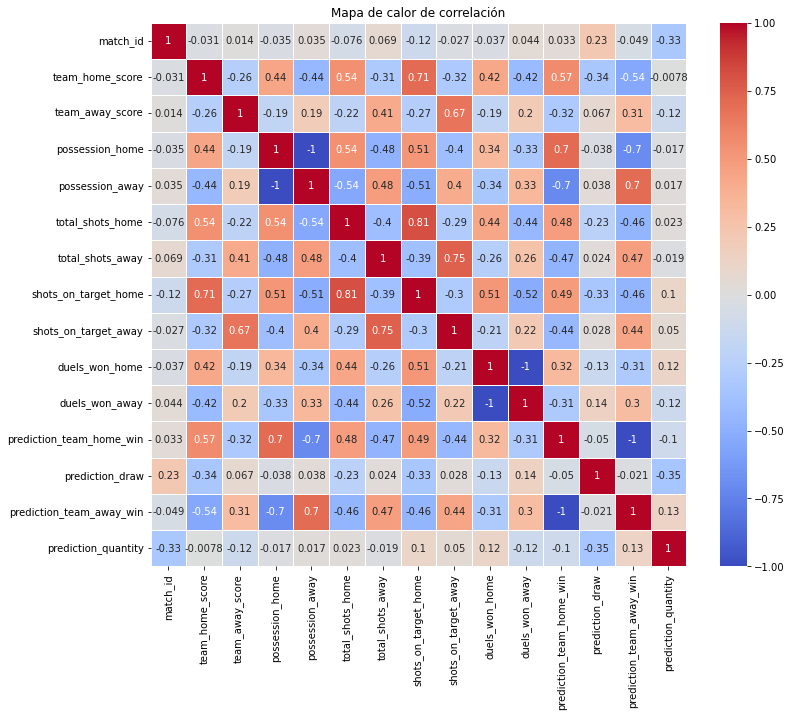

In [143]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Mapa de calor de correlación")
plt.show()

### nodo 1

In [144]:
# nombrar variable que contenga datos del df determinados
home_g = data['team_home_score']
home_g.head()

0    1
1    2
2    0
3    3
4    1
Name: team_home_score, dtype: int64

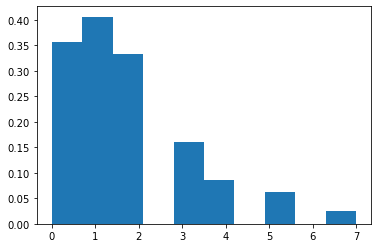

In [145]:
# plotear histograma de los datos

J = 10  # Cantidad de particiones del histograma
[freq, x_hist, _] = plt.hist(home_g,bins = J, density = True ); # histograma
plt.show() # mostrar histograma
x_hist = x_hist[1:] # Se obvia el último valor de x para obtener exactamente J muestras de x

El error de la distribucion bradford es de 118.99257313677272 %
El error de la distribucion beta es de 321.6500029048767 %
El error de la distribucion expon es de 139.52334427176896 %
El error de la distribucion exponnorm es de 140.23746782304264 %
El error de la distribucion norm es de 520.4091793760173 %
El error de la distribucion uniform es de 122.52873563218392 %
El error de la distribucion foldnorm es de 156.77631451043553 %
El error de la distribucion gennorm es de 295.69231518216054 %
El error de la distribucion ksone es de 124.97109901864381 %
El error de la distribucion kappa4 es de 119.71522431085515 %
El error de la distribucion johnsonsb es de 395.1959396590144 %


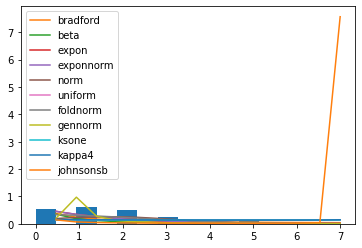

In [158]:
data = home_g

# Probar diferentes distirbuciones de probabilidad
dist_list = ['bradford', 'beta','expon', 'exponnorm','norm','uniform','foldnorm', 'gennorm', 'ksone', 'kappa4', 'johnsonsb']

y_real, x_real,  _ = plt.hist(data, bins = 15, density = True) #hacer histograma

x_real = x_real[1:] # modificar shape para que rea igual

#e = []
def distribucion(dist_list):
    
    def imprimir(dist):
        param = getattr(st, dist).fit(data)
        y_est = getattr(st, dist).pdf(x_real, *param)
        plt.plot(x_real,y_est, label = dist);
        print('El error de la distribucion', dist,'es de', (abs(y_real-y_est)*100/y_est).mean(),'%')
        
    [imprimir(dist) for dist in dist_list]


distribucion(dist_list)
plt.legend()
plt.show()

In [161]:
param = getattr(st, 'kappa4').fit(x_hist) # obtener los parametros
pi = st.kappa4.pdf(x_hist, *param)
# Cálculo de la esperanza usando la expresión teórica
Ei = x_hist*pi

# Cálculo teórico de la chi cuadrada
x2 = ((freq - Ei)**2 / Ei).sum()
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
m = J-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)

Valor de chi cuadrado teorico  =  5.30081002006618


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
3.802359555628466

AttributeError: 'str' object has no attribute 'fit'

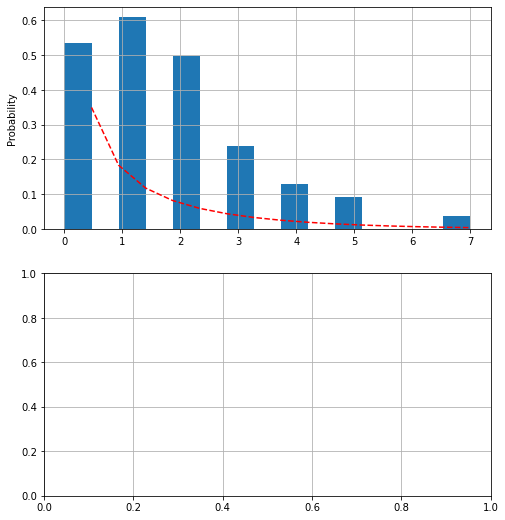

In [160]:
# Histograma de las variables creadas
fig, ax = plt.subplots(2,1, figsize=(8,9))

y, x, _ = ax[0].hist(data,bins = 15, density=True)
x = x[1:]
plt.grid()
ax[0].grid()
#datos
dist = 'beta'
params = getattr(st, dist).fit(data)
# Graficar PDF de la distribución que queremos probar
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')

import statsmodels.api as sm 
grap1 = sm.qqplot(data, dist=dist, line='q', fit=True, ax=ax[1])

In [148]:
sns.kdeplot(data['team_home_score'], color = "blue", linewidth=2)

KeyError: 'team_home_score'

In [106]:
# calcular la estadística de prueba
mu0 = 3.99592930731217
t_statistic, p_value = stats.ttest_1samp(data['team_home_score'], mu0)



# interpretar el resultado
alpha = 0.05

if p_value < alpha:
    print("Se rechaza la hipótesis nula.")
else:
    print("No se puede rechazar la hipótesis nula.")

Se rechaza la hipótesis nula.


In [107]:
stats.ttest_1samp(data['team_home_score'], mu0)

Ttest_1sampResult(statistic=-16.33566658541398, pvalue=9.503897290598071e-32)

In [114]:

from scipy.stats import t

# Generar datos aleatorios
datos = np.array(data['team_home_score'])
# Calcular la varianza original
varianza_original = np.var(datos)

# Configurar los parámetros del método
num_repeticiones = 1000

# Calcular la reducción de varianza
reducciones_varianza = []
for i in range(num_repeticiones):
    indices_aleatorios = np.random.permutation(len(datos))
    conjunto_1 = datos[indices_aleatorios[:len(datos)//2]]
    conjunto_2 = datos[indices_aleatorios[len(datos)//2:]]
    varianza_conjunto_1 = np.var(conjunto_1)
    varianza_conjunto_2 = np.var(conjunto_2)
    varianza_media_subconjuntos = np.mean([varianza_conjunto_1, varianza_conjunto_2])
    reduccion_varianza = (varianza_original - varianza_media_subconjuntos)/varianza_original
    reducciones_varianza.append(reduccion_varianza)

# Calcular la media y el intervalo de confianza de la reducción de varianza
media_reduccion_varianza = np.mean(reducciones_varianza)
error_estandar_reduccion_varianza = np.std(reducciones_varianza)/np.sqrt(num_repeticiones)
t_critical = t.ppf(0.975, num_repeticiones-1)
intervalo_confianza = (media_reduccion_varianza - t_critical*error_estandar_reduccion_varianza, 
                       media_reduccion_varianza + t_critical*error_estandar_reduccion_varianza)

# Imprimir los resultados
print("Varianza original: {:.2f}".format(varianza_original))
print("Reducción de varianza media: {:.2f}".format(media_reduccion_varianza))
print("Intervalo de confianza al 95%: ({:.2f}, {:.2f})".format(intervalo_confianza[0], intervalo_confianza[1]))


Varianza original: 2.34
Reducción de varianza media: 0.01
Intervalo de confianza al 95%: (0.01, 0.01)


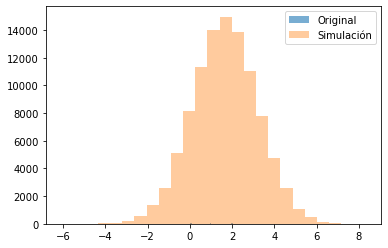

Media de la variable 'team_home_score' original: 1.6637931034482758
Desviación estándar de la variable 'team_home_score' original: 1.53096749620467
Media de la simulación de la variable 'team_home_score': 1.6644484775248127
Desviación estándar de la simulación de la variable 'team_home_score': 1.5323300751937492


In [115]:
import numpy as np
import matplotlib.pyplot as plt

# Verificar la existencia de la columna 'team_home_score' en el conjunto de datos
if 'team_home_score' not in data.columns:
    print("La columna 'team_home_score' no existe en el conjunto de datos")
else:
    # Calcular la media y desviación estándar de la variable 'team_home_score'
    media_team_home_score = np.mean(data['team_home_score'])
    desv_team_home_score = np.std(data['team_home_score'])

    # Generar 100000 números aleatorios distribuidos normalmente con media y desviación estándar de la variable 'team_home_score'
    simulacion_team_home_score = np.random.normal(loc=media_team_home_score, scale=desv_team_home_score, size=100000)

    # Graficar la distribución de la simulación y la distribución original de la variable 'team_home_score'
    plt.hist(data['team_home_score'], bins=75, alpha=0.6, label='Original')
    plt.hist(simulacion_team_home_score, bins=25, alpha=0.4, label='Simulación')
    plt.legend()
    plt.show()

    # Calcular la media y desviación estándar de la simulación
    media_simulacion_team_home_score = np.mean(simulacion_team_home_score)
    desv_simulacion_team_home_score = np.std(simulacion_team_home_score)

    # Imprimir resultados
    print("Media de la variable 'team_home_score' original:", media_team_home_score)
    print("Desviación estándar de la variable 'team_home_score' original:", desv_team_home_score)
    print("Media de la simulación de la variable 'team_home_score':", media_simulacion_team_home_score)
    print("Desviación estándar de la simulación de la variable 'team_home_score':", desv_simulacion_team_home_score)


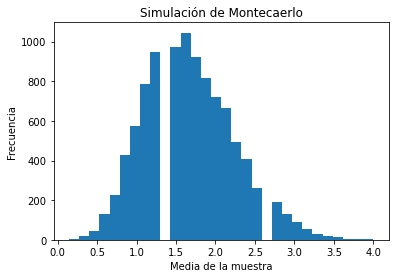

In [117]:
numeros = list(data['team_home_score'])

# Configurar los parámetros de la simulación
num_iteraciones = 10000
num_muestras = 7

# Realizar la simulación de Monte Carlo
resultados = []
for i in range(num_iteraciones):
    muestra = random.sample(numeros, num_muestras)
    media_muestra = sum(muestra)/num_muestras
    resultados.append(media_muestra)

# Visualizar los resultados
plt.hist(resultados, bins=30)
plt.xlabel("Media de la muestra")
plt.ylabel("Frecuencia")
plt.title("Simulación de Montecaerlo")
plt.show()

In [118]:
def kde_statsmodels_m2(x, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return lambda x_i: kde.pdf(x_i)

In [120]:
kde_statsmodels_m2(list(data['team_home_score']))


<function __main__.kde_statsmodels_m2.<locals>.<lambda>(x_i)>

In [92]:
## Función para graficar histogramas
def subplot_dist(lis: 'Insertar la lista con los datos',titu: 'Insertar lista de títulos'):   
    fig, ax = plt.subplots(1, len(lis), sharey=True, figsize=(20, 6))
    fig.subplots_adjust(wspace=.1)
    [ax[i].hist(lis[i]) for i in range(len(lis))]
    [ax[i].set_title(titu[i]) for i in range(len(titu))]

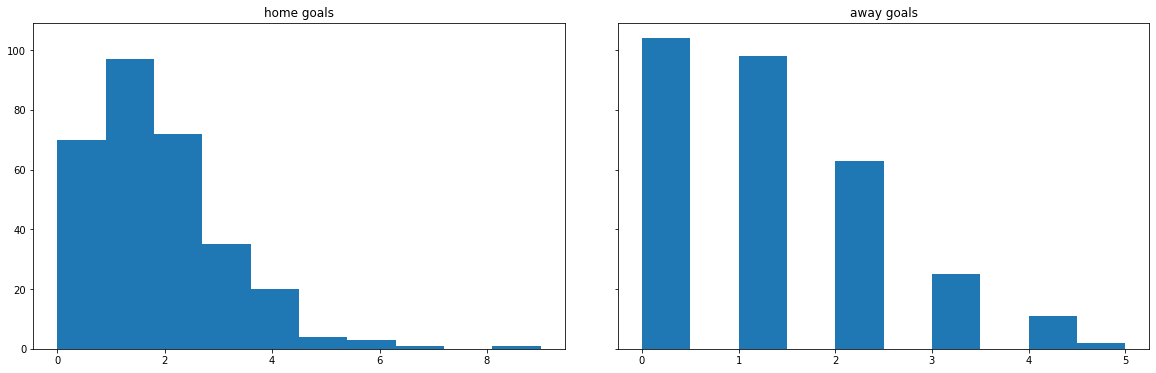

In [93]:
lista_co = [df_premiere_matches['team_home_score'].values, df_premiere_matches['team_away_score'].values ]
titulos_co = ['home goals','away goals']
subplot_dist(lista_co,titulos_co)

In [96]:
#GRIDS 

#Home goals
grid_hg = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0, 4.4, 50)},
                    cv=20)
grid_hg.fit(lista_co[0][:, None])
x_grid_hg = np.linspace(0, 4.4, 1000)
kde_hg = grid_hg.best_estimator_
pdf_hg = np.exp(kde_hg.score_samples(x_grid_hg[:, None])) #Kernel

#away goals
grid_ag = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0, 4.4, 50)},
                    cv=20)
grid_ag.fit(lista_co[1][:, None])
x_grid_ag = np.linspace(0, 4.4, 1000)
kde_ag = grid_ag.best_estimator_
pdf_ag = np.exp(kde_ag.score_samples(x_grid_ag[:, None])) #Kernel



In [97]:
## Función para graficar el kernel
def trans_a_kernel(x_grid,pdf,kde,datos,titulo):
    
    plt.figure()
    plt.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
    plt.hist(datos, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True) 
    plt.legend(loc='upper left')
    plt.title(titulo)
    plt.show()

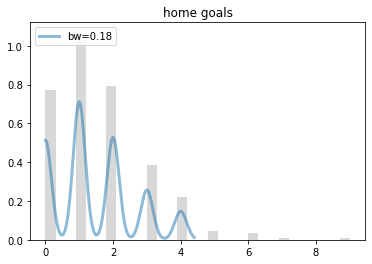

In [98]:
trans_a_kernel(x_grid_hg,pdf_hg,kde_hg,lista_co[0],titulos_co[0])


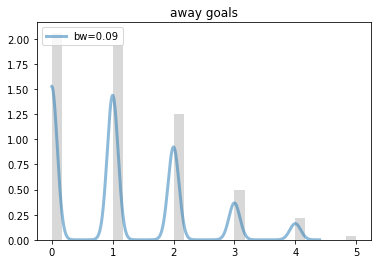

In [99]:
trans_a_kernel(x_grid_ag,pdf_ag,kde_ag,lista_co[1],titulos_co[1])


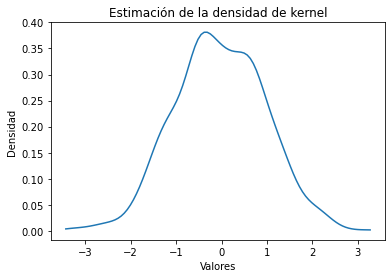

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generar datos de ejemplo
datos = np.random.normal(loc=0, scale=1, size=1000)

# Calcular la densidad de kernel
densidad = gaussian_kde(datos)

# Generar una serie de valores para evaluar la densidad de kernel
x = np.linspace(datos.min(), datos.max(), 100)

# Calcular los valores de la densidad de kernel en cada punto de x
y = densidad(x)

# Graficar la densidad de kernel
plt.plot(x, y)
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.title("Estimación de la densidad de kernel")
plt.show()


In [129]:
from scipy.stats import ttest_ind

# Generar dos conjuntos de datos de ejemplo
datos1 = data['team_home_score']
datos2 = data['team_away_score']

# Realizar una prueba t de dos muestras para determinar si las medias son significativamente diferentes
resultado, p_valor = ttest_ind(datos1, datos2)

# Imprimir el resultado de la prueba
print("Resultado de la prueba t: ", resultado)
print("Valor p: ", p_valor)


Resultado de la prueba t:  1.5390898227320775
Valor p:  0.12515697623871508


In [131]:
import numpy as np

# Generar datos de ejemplo
datos = data['team_home_score']

# Muestreo de importancia
pesos = np.abs(datos) / np.sum(np.abs(datos))
muestra_importancia = np.random.choice(datos, size=len(data['team_home_score']), p=pesos)

# Muestreo estratificado
muestra_estratificada = []
for i in range(10):
    subconjunto = datos[i*100:(i+1)*100]
    muestra_estratificada.append(np.random.choice(subconjunto, size=len(data['team_home_score'])))

muestra_estratificada = np.concatenate(muestra_estratificada)


ValueError: 'a' cannot be empty unless no samples are taken

___
## 2. Especificaciones adicionales.
En el grupo deben haber mínimo dos integrantes y máximo tres integrantes. Para propósitos logísticos nada más, por favor enumérense como *integrante 1*, *integrante 2* e *integrante 3*.

### 2.1 Notebook de jupyter. 
> Los anteriores numerales los deben desarrollar todos en un notebook de jupyter y llamarlo de la siguiente manera `ProyectoModulo1_ApellidoN1_ApellidoN2_ApellidoN3`, donde `ApellidoNi` hace referencia al apellido materno y la inicial del primer nombre del integrante `i`.

### 2.2 Proyecto en `GitHub`.
> El integrante 1 deberá crear un proyecto en `GitHub` llamado **proyecto_modulo1**, donde tendrán todos los archivos relacionados con el proyecto. Los demás integrantes deben hacer un *fork* del proyecto, seguir el proyecto principal con `GitKraken` y hacer al menos dos contribuciones con *pull request* (como se hizo en la tarea). En el proyecto, deben incluir el repositorio remoto del integrante 1.

### 2.3 Presentación.
> Recuerden que la nota del proyecto es mitad el trabajo, y mitad la presentación. Deben hacer una presentación ya sea en power point o utlizando un notebook de python para presentar el trabajo durante un horario de clase que se será posteriomente definido. La presentación, además de llevar todos los componentes básicos descritos en el entregable, debe llevar una tabla de contenido.
> - Presentación: 10 minutos.
> - Seguir estas recomendaciones: https://es.slideshare.net/MeireComputacion/power-point-pautas-para-una-buen-trabajo

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>